# S11_T01_NoSupervisat_Agrupament

### Ex1: Agrupa els diferents vols utilitzant l'algorisme de K-means


In [2]:
#Importem llibreries necessàries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [3]:
import warnings

warnings.filterwarnings('ignore')

In [4]:
#import dataset
pd.set_option("display.max_columns", None)
data_frame = pd.read_csv("C:/Users/Beth/Python_Projects/Tasks_Sprint2/Task5/DelayedFlights.csv")
#Previsualitzem dataset
data_frame.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,N726SW,101.0,115.0,87.0,11.0,25.0,IND,JAX,688,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [5]:
data_frame.shape

(1936758, 30)

In [6]:
#resum del dataset
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 30 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   Year               int64  
 2   Month              int64  
 3   DayofMonth         int64  
 4   DayOfWeek          int64  
 5   DepTime            float64
 6   CRSDepTime         int64  
 7   ArrTime            float64
 8   CRSArrTime         int64  
 9   UniqueCarrier      object 
 10  FlightNum          int64  
 11  TailNum            object 
 12  ActualElapsedTime  float64
 13  CRSElapsedTime     float64
 14  AirTime            float64
 15  ArrDelay           float64
 16  DepDelay           float64
 17  Origin             object 
 18  Dest               object 
 19  Distance           int64  
 20  TaxiIn             float64
 21  TaxiOut            float64
 22  Cancelled          int64  
 23  CancellationCode   object 
 24  Diverted           int64  
 25  CarrierDelay      

Tenim 25 variables numèriques (tipus int64 o float64) i 5 variables categòriques (tipus objecte)

In [7]:
#comprovem valors nuls
data_frame.isnull().sum()

Unnamed: 0                0
Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                7110
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
TailNum                   5
ActualElapsedTime      8387
CRSElapsedTime          198
AirTime                8387
ArrDelay               8387
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                 7110
TaxiOut                 455
Cancelled                 0
CancellationCode          0
Diverted                  0
CarrierDelay         689270
WeatherDelay         689270
NASDelay             689270
SecurityDelay        689270
LateAircraftDelay    689270
dtype: int64

In [8]:
#comprovem duplicates i si n'hi ha els eliminem
sum(data_frame.duplicated())

0

In [9]:
#eliminem la columna "Unnamed:0" ja que no la necessitem per res
data_frame.drop(["Unnamed: 0"], axis=1, inplace=True)

In [10]:
#resum estadístic de les variables numèriques
data_frame.describe()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1936758.0,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.929648e+06,1.936758e+06,1.936758e+06,1.928371e+06,1.936560e+06,1.928371e+06,1.928371e+06,1.936758e+06,1.936758e+06,1.929648e+06,1.936303e+06,1.936758e+06,1.936758e+06,1.247488e+06,1.247488e+06,1.247488e+06,1.247488e+06,1.247488e+06
mean,2008.0,6.111106e+00,1.575347e+01,3.984827e+00,1.518534e+03,1.467473e+03,1.610141e+03,1.634225e+03,2.184263e+03,1.333059e+02,1.343027e+02,1.082771e+02,4.219988e+01,4.318518e+01,7.656862e+02,6.812975e+00,1.823220e+01,3.268348e-04,4.003598e-03,1.917940e+01,3.703571e+00,1.502164e+01,9.013714e-02,2.529647e+01
std,0.0,3.482546e+00,8.776272e+00,1.995966e+00,4.504853e+02,4.247668e+02,5.481781e+02,4.646347e+02,1.944702e+03,7.206007e+01,7.134144e+01,6.864261e+01,5.678472e+01,5.340250e+01,5.744797e+02,5.273595e+00,1.433853e+01,1.807562e-02,6.314722e-02,4.354621e+01,2.149290e+01,3.383305e+01,2.022714e+00,4.205486e+01
min,2008.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.400000e+01,-2.500000e+01,0.000000e+00,-1.090000e+02,6.000000e+00,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2008.0,3.000000e+00,8.000000e+00,2.000000e+00,1.203000e+03,1.135000e+03,1.316000e+03,1.325000e+03,6.100000e+02,8.000000e+01,8.200000e+01,5.800000e+01,9.000000e+00,1.200000e+01,3.380000e+02,4.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2008.0,6.000000e+00,1.600000e+01,4.000000e+00,1.545000e+03,1.510000e+03,1.715000e+03,1.705000e+03,1.543000e+03,1.160000e+02,1.160000e+02,9.000000e+01,2.400000e+01,2.400000e+01,6.060000e+02,6.000000e+00,1.400000e+01,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,8.000000e+00
75%,2008.0,9.000000e+00,2.300000e+01,6.000000e+00,1.900000e+03,1.815000e+03,2.030000e+03,2.014000e+03,3.422000e+03,1.650000e+02,1.650000e+02,1.370000e+02,5.600000e+01,5.300000e+01,9.980000e+02,8.000000e+00,2.100000e+01,0.000000e+00,0.000000e+00,2.100000e+01,0.000000e+00,1.500000e+01,0.000000e+00,3.300000e+01
max,2008.0,1.200000e+01,3.100000e+01,7.000000e+00,2.400000e+03,2.359000e+03,2.400000e+03,2.400000e+03,9.742000e+03,1.114000e+03,6.600000e+02,1.091000e+03,2.461000e+03,2.467000e+03,4.962000e+03,2.400000e+02,4.220000e+02,1.000000e+00,1.000000e+00,2.436000e+03,1.352000e+03,1.357000e+03,3.920000e+02,1.316000e+03


Anem a fixar-nos en les variables categòriques per veure quina ens serveix com a target. Observant el dataset, podem dir que agafarem la variable "UniqueCarrier" ja que ens demanen agrupar els diferents vols, i és la que ens dona els diferents noms de companyies de vols

In [11]:
data_frame["UniqueCarrier"].unique()

array(['WN', 'XE', 'YV', 'OH', 'OO', 'UA', 'US', 'DL', 'EV', 'F9', 'FL',
       'HA', 'MQ', 'NW', '9E', 'AA', 'AQ', 'AS', 'B6', 'CO'], dtype=object)

In [12]:
#amb això s'obté les etiquetes de la variable
#mirem quantes etiquetes diferents tenim
len(data_frame["UniqueCarrier"].unique())

20

In [13]:
#anem a explorar la resta de les 4 variables categòriques
data_frame["TailNum"].unique()

array(['N712SW', 'N772SW', 'N428WN', ..., 'N75428', 'N75429', 'N78008'],
      dtype=object)

In [14]:
len(data_frame["TailNum"].unique())

5367

In [15]:
#Són masses etiquetes per utilitzar-la com a target

In [16]:
len(data_frame["Origin"].unique())

303

In [17]:
len(data_frame["Dest"].unique())

304

In [18]:
len(data_frame["CancellationCode"].unique())

4

In [19]:
data_frame["CancellationCode"].unique()

array(['N', 'A', 'B', 'C'], dtype=object)

In [20]:
data_frame["CancellationCode"].value_counts()

N    1936125
B        307
A        246
C         80
Name: CancellationCode, dtype: int64

Obervem que gairebé totes les instàncies del dataset, tenen pràcticament la mateixa etiqueta, aleshores no és recomanable  utilitzar aquesta variable com a target a la hora d'agrupar els vols del nostre dataset. La millor opció és agrupar els vols per companyia de vol (UniqueCarrier)

In [21]:
#podem eliminar les variables categòriques que no utilitzarem com a target
data_frame.drop(["CancellationCode", "TailNum", "Origin", "Dest"], axis=1, inplace=True)
data_frame.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,128.0,150.0,116.0,-14.0,8.0,810,4.0,8.0,0,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,128.0,145.0,113.0,2.0,19.0,810,5.0,10.0,0,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,96.0,90.0,76.0,14.0,8.0,515,3.0,17.0,0,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,90.0,90.0,77.0,34.0,34.0,515,3.0,10.0,0,0,2.0,0.0,0.0,0.0,32.0
4,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,101.0,115.0,87.0,11.0,25.0,688,4.0,10.0,0,0,NaN,NaN,NaN,NaN,NaN


In [22]:
#Comprovem valors nan
data_frame.isna().sum()

Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                7110
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
ActualElapsedTime      8387
CRSElapsedTime          198
AirTime                8387
ArrDelay               8387
DepDelay                  0
Distance                  0
TaxiIn                 7110
TaxiOut                 455
Cancelled                 0
Diverted                  0
CarrierDelay         689270
WeatherDelay         689270
NASDelay             689270
SecurityDelay        689270
LateAircraftDelay    689270
dtype: int64

In [23]:
#eliminem columnes amb nulls values
data_frame.drop(["CarrierDelay", "WeatherDelay","NASDelay","SecurityDelay","LateAircraftDelay"], axis=1, inplace=True)

In [24]:
data_frame.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,128.0,150.0,116.0,-14.0,8.0,810,4.0,8.0,0,0
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,128.0,145.0,113.0,2.0,19.0,810,5.0,10.0,0,0
2,2008,1,3,4,628.0,620,804.0,750,WN,448,96.0,90.0,76.0,14.0,8.0,515,3.0,17.0,0,0
3,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,90.0,90.0,77.0,34.0,34.0,515,3.0,10.0,0,0
4,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,101.0,115.0,87.0,11.0,25.0,688,4.0,10.0,0,0


In [25]:
data_frame.isna().sum()

Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
DepTime                 0
CRSDepTime              0
ArrTime              7110
CRSArrTime              0
UniqueCarrier           0
FlightNum               0
ActualElapsedTime    8387
CRSElapsedTime        198
AirTime              8387
ArrDelay             8387
DepDelay                0
Distance                0
TaxiIn               7110
TaxiOut               455
Cancelled               0
Diverted                0
dtype: int64

In [26]:
data_frame.dropna(subset = ["ArrDelay","ArrTime", "ActualElapsedTime", "CRSElapsedTime", "AirTime","TaxiIn", "TaxiOut"], inplace = True)

In [27]:
data_frame.isna().sum()

Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
CRSDepTime           0
ArrTime              0
CRSArrTime           0
UniqueCarrier        0
FlightNum            0
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
Distance             0
TaxiIn               0
TaxiOut              0
Cancelled            0
Diverted             0
dtype: int64

L'estandarització d'un conjunt de dades és un requisit comú per a molts models d'aprenentatge automàtic. Normalment, això es fa eliminant la mitjana i escalant a la variança. Tanmateix, els valors atípics(outliers) sovint poden influir negativament en la mitjana/variança de la mostra. En aquests casos, la mediana i el rang interquartil sovint donen millors resultats

Utilitzem Label-Encoding per convertir la nostra variable categòrica en valors numèrics, ho fem en la variable que agafem com a target, ja que l'algoritme treballa amb valors numèrics.

In [28]:
#agafarem un amostra simple per poder treballar millor, ja que tenim masses entrades i el procès s'enlenteix molt
 
data_frame_sample = data_frame.sample(frac=0.25, random_state=8)

data_frame.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,128.0,150.0,116.0,-14.0,8.0,810,4.0,8.0,0,0
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,128.0,145.0,113.0,2.0,19.0,810,5.0,10.0,0,0
2,2008,1,3,4,628.0,620,804.0,750,WN,448,96.0,90.0,76.0,14.0,8.0,515,3.0,17.0,0,0
3,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,90.0,90.0,77.0,34.0,34.0,515,3.0,10.0,0,0
4,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,101.0,115.0,87.0,11.0,25.0,688,4.0,10.0,0,0


In [29]:
from sklearn.preprocessing import LabelEncoder

X= data_frame_sample
y= data_frame_sample["UniqueCarrier"]

labelencoder = LabelEncoder()

X["UniqueCarrier"] = labelencoder.fit_transform(X["UniqueCarrier"])

y = labelencoder.transform(y)

In [30]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 482093 entries, 266691 to 468427
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Year               482093 non-null  int64  
 1   Month              482093 non-null  int64  
 2   DayofMonth         482093 non-null  int64  
 3   DayOfWeek          482093 non-null  int64  
 4   DepTime            482093 non-null  float64
 5   CRSDepTime         482093 non-null  int64  
 6   ArrTime            482093 non-null  float64
 7   CRSArrTime         482093 non-null  int64  
 8   UniqueCarrier      482093 non-null  int32  
 9   FlightNum          482093 non-null  int64  
 10  ActualElapsedTime  482093 non-null  float64
 11  CRSElapsedTime     482093 non-null  float64
 12  AirTime            482093 non-null  float64
 13  ArrDelay           482093 non-null  float64
 14  DepDelay           482093 non-null  float64
 15  Distance           482093 non-null  int64  
 1

In [31]:
X.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
266691,2008,2,19,2,1644.0,1630,1906.0,1828,15,1585,202.0,178.0,169.0,38.0,14.0,1012,21.0,12.0,0,0
1026797,2008,6,9,1,1921.0,1910,2002.0,2001,12,755,101.0,111.0,82.0,1.0,11.0,528,5.0,14.0,0,0
431390,2008,3,11,2,1430.0,1237,1610.0,1429,13,5660,100.0,112.0,87.0,101.0,113.0,515,1.0,12.0,0,0
408904,2008,3,29,6,1526.0,1505,1627.0,1610,17,2617,61.0,65.0,50.0,17.0,21.0,304,2.0,9.0,0,0
1536341,2008,10,20,1,1833.0,1640,1924.0,1735,17,509,51.0,55.0,41.0,109.0,113.0,189,3.0,7.0,0,0


In [32]:
X.UniqueCarrier.value_counts()

17    94007
1     47513
11    35321
15    35207
14    33061
6     28253
18    25930
5     24907
16    24456
7     20454
12    19757
9     17939
19    16823
4     13718
13    13102
0     12809
3      9814
8      7021
10     1808
2       193
Name: UniqueCarrier, dtype: int64

In [33]:
#Feature Scaling: normalitzarem totes les variables aplicant MinMaxScaler abans d'aplicar l'algorisme K-means
cols= X.columns

In [34]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X = scaler.fit_transform(X)

In [35]:
X=pd.DataFrame(X, columns=[cols])
X.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
0,0.0,0.090909,0.600000,0.166667,0.684869,0.690840,0.794081,0.774905,0.789474,0.162628,0.241290,0.292217,0.259202,0.064770,0.005175,0.198945,0.087500,0.028436,0.0,0.0
1,0.0,0.454545,0.266667,0.000000,0.800333,0.809584,0.834098,0.848241,0.631579,0.077413,0.110968,0.193833,0.125767,0.042373,0.003234,0.100791,0.020833,0.033175,0.0,0.0
2,0.0,0.181818,0.333333,0.166667,0.595665,0.524173,0.670696,0.605765,0.684211,0.581006,0.109677,0.195301,0.133436,0.102906,0.069211,0.098155,0.004167,0.028436,0.0,0.0
3,0.0,0.181818,0.933333,0.833333,0.635682,0.637829,0.677782,0.682493,0.894737,0.268583,0.059355,0.126285,0.076687,0.052058,0.009702,0.055364,0.008333,0.021327,0.0,0.0
4,0.0,0.818182,0.633333,0.000000,0.763652,0.695081,0.801584,0.735481,0.894737,0.052156,0.046452,0.111601,0.062883,0.107748,0.069211,0.032042,0.012500,0.016588,0.0,0.0


Un cop tenim normalitzades totes les dates, ja podem aplicar el model K-means
Començarem amb 2 clusters
Agafarem una mostra del nostre dataset ja que tenim masses dades i el procès s'enlenteix molt

In [36]:
from sklearn.cluster import KMeans

kmeans = KMeans(init="random", n_clusters=2, n_init=10, max_iter=300,random_state=0) 

kmeans.fit(X)

KMeans(init='random', n_clusters=2, random_state=0)

In [37]:
#anem a avaluar el model
kmeans.cluster_centers_

array([[0.        , 0.46142162, 0.50123431, 0.76378562, 0.65383039,
        0.64208171, 0.68935002, 0.71419829, 0.58734277, 0.21975076,
        0.15272628, 0.22806971, 0.16620968, 0.06777066, 0.02452117,
        0.1492843 , 0.02864573, 0.04293645, 0.        , 0.        ],
       [0.        , 0.46735697, 0.48175449, 0.19605677, 0.60852731,
        0.59929913, 0.64893773, 0.66715376, 0.58453137, 0.22927433,
        0.15173397, 0.2268378 , 0.16502546, 0.06684787, 0.02348991,
        0.14747844, 0.0281572 , 0.04322157, 0.        , 0.        ]])

L'algoritme KMeans agrupa les dades intentant separar mostres en n grups de variàncies iguals, minimitzant un criteri conegut com a inèrcia o suma de quadrats dins del clúster
La inèrcia, o el criteri de la suma de quadrats dins del clúster, es pot reconèixer com a mesura de la coherència interna dels clústers
L'algoritme de k-means divideix un conjunt de N mostres X en K grups C disjunts, cadascun descrit per la mitjana j de les mostres del clúster
Les mitjanes s'anomenen comunament els centroides del clúster

L'algoritme K-means té com a objectiu triar els centroides que minimitzin la inèrcia, o la suma dins del clúster del criteri quadrat

La inèrcia no és una mètrica normalitzada. Els valors més baixos d'inèrcia són millors i zero és òptim.

Les estadístiques amb el SSE més baix estan disponibles com a atributs de kmeans després d'ajustar el model .fit()
The lowest SSE value (kmeans.inertia_)
Final locations of the centroid (kmeans.cluster_centers_)
The number of iterations required to converge (kmeans.n_iter_)

In [38]:
#inèrcia: com menor sigui la inèrcia del model, millor s'ajustarà el model
kmeans.inertia_

269242.51002855966

Podem veure que el model ens dona una inèrcia molt alta. Amb el que no tenim un bon model, anem a avaluar-lo per veure com el podem millorar

In [39]:
labels = kmeans.labels_
labels

array([1, 1, 1, ..., 0, 1, 1])

In [40]:
# comprovem quantes mostres estan correctament etiquetades
correct_labels = sum(y == labels)

print("Result: %d de %d mostres estan correctament etiquetades" % (correct_labels, y.size))                  

Result: 28934 de 482093 mostres estan correctament etiquetades


In [41]:
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Accuracy score: 0.06


In [42]:
#Obtenim una precisió de classificació molt baixa del 6% pel nostre model no supervisat

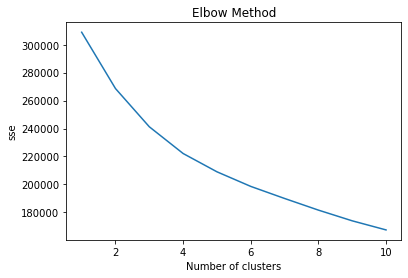

In [43]:
#utilitzem el mètode Elbow per trobar quin seria el nombre de clusters més òptim

sse = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)
plt.plot(range(1, 11), sse)
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("sse")
plt.show()

In [44]:
#Determinar el punt del colze a la corba SSE no sempre és senzill, com ara en el nostre cas 
#Si teniu problemes per triar el punt de colze de la corba, podeu utilitzar un paquet Python, kneed, per 
#identificar el punt de colze de manera programàtica.

from kneed import KneeLocator

kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")

kl.elbow

4

In [45]:
#ens dona que el colze està en 4 clusters... anem a provar el model amb n_clusters = 4 que seria el òptim

kmeans = KMeans(init="random", n_clusters=4, n_init=10, max_iter=300, random_state=0)

kmeans.fit(X)

kmeans.cluster_centers_

print("Inercia: ", kmeans.inertia_)

# check how many of the samples were correctly labeled
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d de %d mostres estan correctament etiquetades" % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Inercia:  222174.81531377335
Result: 10083 de 482093 mostres estan correctament etiquetades
Accuracy score: 0.02


Obtenim una precisió de classificació més baixa que amb 2 clusters, del 2% enlloc del 6%, i una inèrcia una mica més baixa 
però massa alta encara

In [46]:
#anem a provar el model amb 6 clusters
kmeans = KMeans(init="random", n_clusters=6, n_init=10, max_iter=300, random_state=0)

kmeans.fit(X)

kmeans.cluster_centers_

print("Inercia: ", kmeans.inertia_)

# check how many of the samples were correctly labeled
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d de %d mostres estan correctament etiquetades" % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Inercia:  198566.12420341896
Result: 23427 de 482093 mostres estan correctament etiquetades
Accuracy score: 0.05


Obtenim una precisió de classificació més baixa que amb 2 clusters, del 5% enlloc del 6%, i una inèrcia bastant més baixa 
però massa alta encara

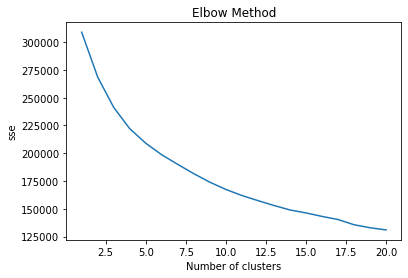

In [66]:
#com que tenim una target amb 20 classes, i veiem que la precisió que obtenim és molt baixa...buscarem a veure si el colze
#està a un valor més alt del q ens ha donat en el rang de 1 a 11!
#utilitzem el mètode Elbow per trobar quin seria el nombre de clusters més òptim

sse = []
for i in range(1, 21):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)
plt.plot(range(1, 21), sse)
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("sse")
plt.show()

In [67]:
from kneed import KneeLocator

kl = KneeLocator(range(1, 21), sse, curve="convex", direction="decreasing")

kl.elbow

6

In [68]:
#anem a provar el model amb 8 clusters
kmeans = KMeans(init="random", n_clusters=8, n_init=10, max_iter=300, random_state=0)

kmeans.fit(X)

kmeans.cluster_centers_

print("Inercia: ", kmeans.inertia_)

# check how many of the samples were correctly labeled
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d de %d mostres estan correctament etiquetades" % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Inercia:  181496.13660030143
Result: 14521 de 482093 mostres estan correctament etiquetades
Accuracy score: 0.03


El silhouette coefficient és una mesura de la cohesió i la separació del clúster
Els valors oscil·len entre -1 i 1. Els nombres més grans indiquen que les mostres estan més a prop dels seus clusters que d'altres clusters

In [ ]:
#Llistat de coeficients per a cada K
silhouette_coefficients = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters = k, **kmeans_kwargs)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_coefficients.append(score)

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [ ]:
#no he aconseguit obtenir el gràfic dels coefficients de silhouette, ni el llistat de coeficients per tema de lentitut de
#procès de l'ordinador... es queda estona calculant i es penja el notebook!

El gràfic de les puntuacions mitjanes de Silhouette per a cada k mostraria quina és la millor opció per a k, el punt de puntuació màxima!

### Ex2: Agrupa els diferents vols utilitzant l'algorisme de clustering jeràrquic

### Ex3: Calcula el rendiment del clustering mitjançant un paràmetre com pot ser silhouette

Aquesta part està feta al final de l'exercici 1